In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Data_time_series.csv', index_col='Date', parse_dates= True)
df.index.freq='MS'

In [3]:
df

,Coconut_oil,Maize,Wheat
Date,,,
1960-01-01,390.00,45.00,59.89
1960-02-01,379.00,44.00,60.99
1960-03-01,361.00,45.00,61.73
1960-04-01,338.00,45.00,60.99
1960-05-01,321.00,48.00,57.69
...,...,...,...
2021-12-01,1695.71,264.54,376.81
2022-01-01,2016.14,276.62,374.24
2022-02-01,2147.89,292.62,390.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748 entries, 1960-01-01 to 2022-04-01
Freq: MS
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Coconut_oil  748 non-null    float64
 1   Maize        748 non-null    float64
 2   Wheat        748 non-null    float64
dtypes: float64(3)
memory usage: 23.4 KB


# DESCRIPTIVE_STATISTICS

<AxesSubplot:xlabel='Date'>

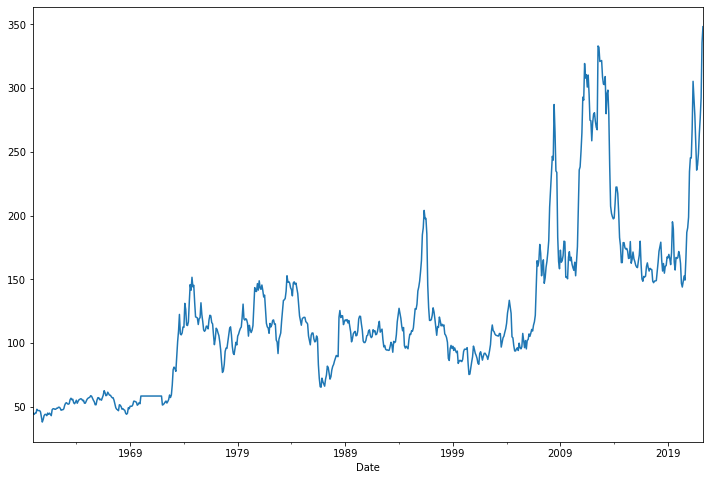

In [5]:
df['Maize'].plot(figsize=(12,8))

In [6]:
 df['Maize'].describe()

count    748.000000
mean     121.339118
std       61.169387
min       38.000000
25%       84.270000
50%      109.565000
75%      148.852500
max      348.170000
Name: Maize, dtype: float64

<AxesSubplot:>

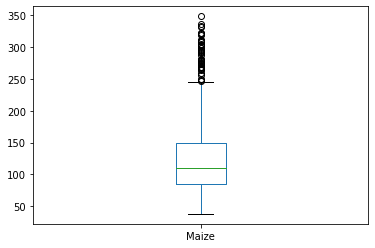

In [7]:
df['Maize'].plot.box()

In [8]:
df['Maize'].skew()

1.3074445617036292

In [9]:
df['Maize'].kurtosis()

1.831708051575116

# DECOMPOSITION OF SERIES

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
decompose= seasonal_decompose(df['Maize'])

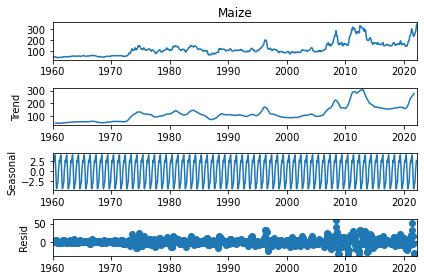

In [12]:
decompose.plot();

<AxesSubplot:xlabel='Date'>

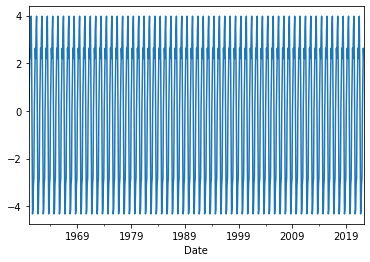

In [13]:
decompose.seasonal.plot()

<AxesSubplot:xlabel='Date'>

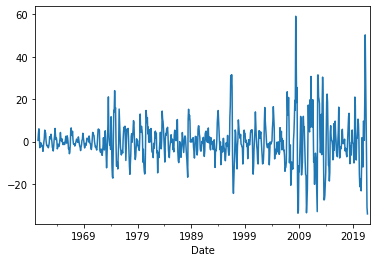

In [14]:
decompose.resid.plot()

In [15]:
decompose.resid.values

array([            nan,             nan,             nan,             nan,
                   nan,             nan,  5.87351783e-01,  3.99326576e+00,
        6.03097410e+00,  1.96803055e+00, -2.86095687e+00, -9.03695943e-01,
       -5.23484194e-01, -7.93074358e-01, -1.67152381e+00, -2.34912627e+00,
       -2.18607299e+00, -4.57835441e+00, -2.16223155e+00, -2.17150905e-01,
        1.41014076e+00,  5.41886388e+00,  4.72737646e+00,  4.00963739e+00,
        3.99015806e-01, -1.37307436e+00, -2.03985714e+00, -1.80079294e+00,
       -2.18857299e+00, -2.91085441e+00, -2.02598155e+00, -6.93400905e-01,
        2.34180743e+00,  1.87511388e+00,  1.37154313e+00,  3.47755406e+00,
        1.64526581e+00, -1.05157691e-01, -2.71235714e+00, -3.24370960e+00,
       -4.41523966e+00, -2.13502108e+00,  8.24435117e-01,  2.88493243e+00,
        6.20555743e+00,  3.03803055e+00,  9.15709795e-01,  1.62255406e+00,
        3.74432473e-01, -3.40765769e+00, -2.89069048e+00, -1.23120960e+00,
       -2.01273966e+00, -

In [16]:
decompose.observed

Date
1960-01-01     45.00
1960-02-01     44.00
1960-03-01     45.00
1960-04-01     45.00
1960-05-01     48.00
               ...  
2021-12-01    264.54
2022-01-01    276.62
2022-02-01    292.62
2022-03-01    335.53
2022-04-01    348.17
Freq: MS, Name: Maize, Length: 748, dtype: float64

In [17]:
decompose.weights

Date
1960-01-01    1.0
1960-02-01    1.0
1960-03-01    1.0
1960-04-01    1.0
1960-05-01    1.0
             ... 
2021-12-01    1.0
2022-01-01    1.0
2022-02-01    1.0
2022-03-01    1.0
2022-04-01    1.0
Freq: MS, Name: weights, Length: 748, dtype: float64

# TIME SERIES ANALYSIS

<AxesSubplot:xlabel='Date'>

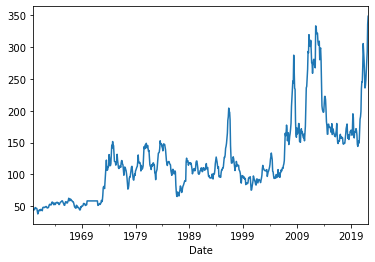

In [18]:
df['Maize'].plot()

In [19]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [20]:
from arch.unitroot import ADF,PhillipsPerron,KPSS

In [21]:
ADF(df['Maize'])

Test Statistic,-1.277
P-value,0.640
Lags,16


In [22]:
PhillipsPerron(df['Maize'])

Test Statistic,-1.017
P-value,0.747
Lags,20


# 1st Diff

In [23]:
df_diff=df['Maize'].diff(periods=1)

In [24]:
df_diff.head()

Date
1960-01-01    NaN
1960-02-01   -1.0
1960-03-01    1.0
1960-04-01    0.0
1960-05-01    3.0
Freq: MS, Name: Maize, dtype: float64

In [25]:
df ['Maize'].head()

Date
1960-01-01    45.0
1960-02-01    44.0
1960-03-01    45.0
1960-04-01    45.0
1960-05-01    48.0
Freq: MS, Name: Maize, dtype: float64

<AxesSubplot:xlabel='Date'>

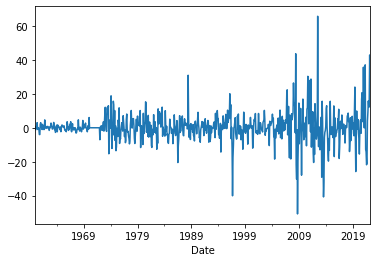

In [26]:
df_diff.plot()

In [27]:
df_diff.dropna(inplace=True)

In [28]:
ADF(df_diff)

Test Statistic,-5.856
P-value,0.000
Lags,15


In [116]:
PhillipsPerron(df_diff)

Test Statistic,-20.488
P-value,0.000
Lags,20


# ARIMA MODEL

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('Data_time_series.csv')

df.index.freq= 'MS'

In [31]:
df.head()

,Date,Coconut_oil,Maize,Wheat
0,1960-01-01,390.0,45.0,59.89
1,1960-02-01,379.0,44.0,60.99
2,1960-03-01,361.0,45.0,61.73
3,1960-04-01,338.0,45.0,60.99
4,1960-05-01,321.0,48.0,57.69


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         748 non-null    object 
 1   Coconut_oil  748 non-null    float64
 2   Maize        748 non-null    float64
 3   Wheat        748 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.5+ KB


# DESCRIPTIVE STATISTICS

<AxesSubplot:>

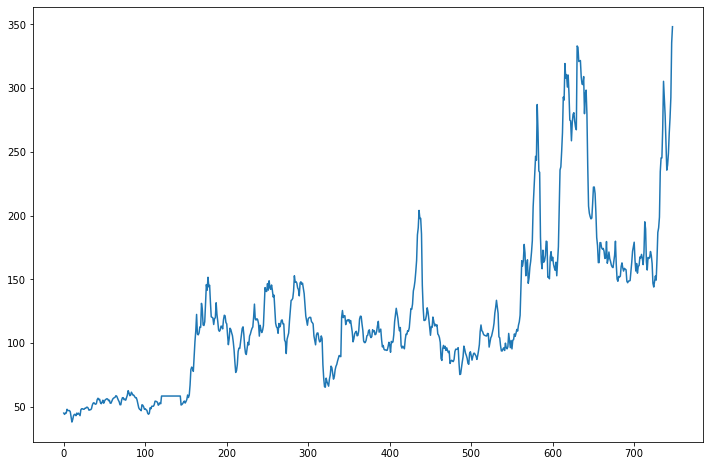

In [33]:
df['Maize'].plot(figsize=(12,8))

In [34]:
df['Maize'].describe()

count    748.000000
mean     121.339118
std       61.169387
min       38.000000
25%       84.270000
50%      109.565000
75%      148.852500
max      348.170000
Name: Maize, dtype: float64

In [35]:
df['Maize'].skew()

1.3074445617036292

In [36]:
df['Maize'].kurtosis()

1.831708051575116

# DECOMPOSE THE SERIES

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
decompose= seasonal_decompose(df.Maize,model='multiplicative', period=1)

In [39]:
decompose.seasonal

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
743    1.0
744    1.0
745    1.0
746    1.0
747    1.0
Name: seasonal, Length: 748, dtype: float64

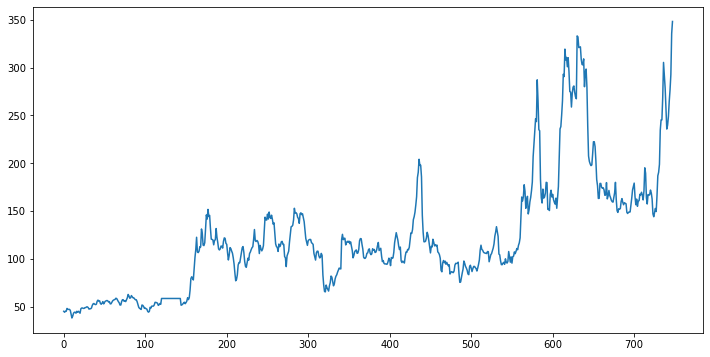

In [40]:
decompose.trend.plot(figsize=(12,6));

<AxesSubplot:>

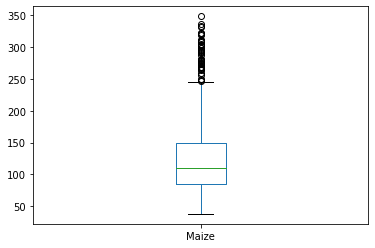

In [41]:
df['Maize'].plot.box()

# TIME SERIES MODELLING

<AxesSubplot:>

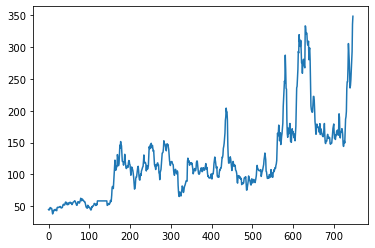

In [42]:
df['Maize'].plot()

In [43]:
from arch.unitroot import ADF, KPSS, PhillipsPerron

In [44]:
PhillipsPerron(df['Maize'])

Test Statistic,-1.017
P-value,0.747
Lags,20


In [45]:
ADF(df['Maize'])

Test Statistic,-1.277
P-value,0.640
Lags,16


# 1st Diff

In [46]:
df_diff = df['Maize'].diff(periods=1).iloc[1:]

In [47]:
df_diff.head()

1   -1.0
2    1.0
3    0.0
4    3.0
5   -1.0
Name: Maize, dtype: float64

In [48]:
PhillipsPerron(df_diff)

Test Statistic,-20.488
P-value,0.000
Lags,20


In [49]:
df_diff.head()

1   -1.0
2    1.0
3    0.0
4    3.0
5   -1.0
Name: Maize, dtype: float64

In [50]:
ADF(df_diff)

Test Statistic,-5.856
P-value,0.000
Lags,15


<AxesSubplot:>

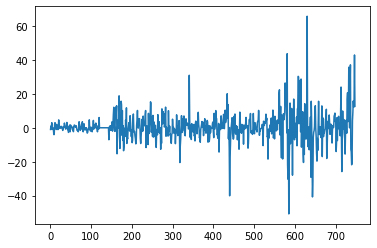

In [51]:
df_diff.plot()

# ACF AND PACF

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

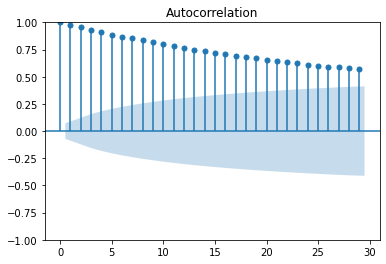

In [53]:
plot_acf(df['Maize']); 

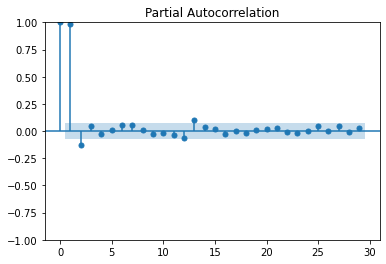

In [54]:
plot_pacf(df['Maize']); 

# AUTO ARIMA

In [55]:
from pmdarima import auto_arima

In [56]:
stepwise_fit = auto_arima(df['Maize'], start_p=0,start_q=0, max_p=6,max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5345.149, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5294.175, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5298.349, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5344.796, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5295.810, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5295.650, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5297.510, Time=0.76 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5293.163, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5294.764, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5294.586, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5297.486, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5296.438, Time=0.51 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.140 seconds


In [57]:
stepwise_fit = auto_arima(df['Maize'], start_p=0,start_q=0, max_p=6,max_q=3, seasonal=False, trace=True, information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=5354.381, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=5308.023, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=5312.197, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=5349.412, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=5314.274, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=5314.114, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : BIC=5320.590, Time=0.84 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=5302.395, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : BIC=5308.612, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=5308.434, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=5306.718, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : BIC=5314.902, Time=0.32 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.546 seconds


In [58]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  748
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2644.581
Date:                Thu, 16 Jun 2022   AIC                           5293.163
Time:                        12:37:08   BIC                           5302.395
Sample:                             0   HQIC                          5296.721
                                - 748                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2634      0.021     12.464      0.000       0.222       0.305
sigma2        69.5856      1.427     48.753      0.000      66.788      72.383
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3604.36
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               7.64   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         748 non-null    object 
 1   Coconut_oil  748 non-null    float64
 2   Maize        748 non-null    float64
 3   Wheat        748 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.5+ KB


In [62]:
748-12

736

In [63]:
train = df.iloc[:736]
test = df.iloc[736:]

In [64]:
len(test)

12

In [65]:
train.tail()

,Date,Coconut_oil,Maize,Wheat
731,2020-12-01,1464.96,198.77,268.55
732,2021-01-01,1463.07,234.47,289.30
733,2021-02-01,1444.50,245.24,289.40
734,2021-03-01,1540.65,245.17,273.13
735,2021-04-01,1659.64,268.23,280.95


In [66]:
test.head()

,Date,Coconut_oil,Maize,Wheat
736,2021-05-01,1715.24,305.31,297.25
737,2021-06-01,1670.68,292.56,285.55
738,2021-07-01,1584.09,278.43,294.27
739,2021-08-01,1493.64,256.61,324.52
740,2021-09-01,1485.00,235.62,337.55


# ARIMA MODEL FOR MAIZE

In [67]:
model_pulse = ARIMA(train['Maize'], order=(1,1,0))

result_pulse = model_pulse.fit()
result_pulse.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Maize   No. Observations:                  736
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2576.687
Date:                Thu, 16 Jun 2022   AIC                           5157.375
Time:                        12:37:08   BIC                           5166.574
Sample:                             0   HQIC                          5160.923
                                - 736                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2331      0.022     10.557      0.000       0.190       0.276
sigma2        64.9378      1.286     50.478      0.000      62.416      67.459
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              4320.14
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               7.37   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
model_pulse = ARIMA(train['Maize'], order=(0,0,0))

result_pulse = model_pulse.fit()
result_pulse.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Maize   No. Observations:                  736
Model:                          ARIMA   Log Likelihood               -4031.848
Date:                Thu, 16 Jun 2022   AIC                           8067.695
Time:                        12:37:08   BIC                           8076.898
Sample:                             0   HQIC                          8071.244
                                - 736                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.7327      2.797     42.451      0.000     113.251     124.215
sigma2      3353.3926    160.776     20.858      0.000    3038.277    3668.508
===================================================================================
Ljung-Box (L1) (Q):                 715.78   Jarque-Bera (JB):               337.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.28   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
prediction = result_pulse.predict(start=len(train),end=len(train)+len(test)-1, typ='levels' ).rename('ARIMA(1,1,0)-predictions')

In [70]:
prediction

736    118.732713
737    118.732713
738    118.732713
739    118.732713
740    118.732713
741    118.732713
742    118.732713
743    118.732713
744    118.732713
745    118.732713
746    118.732713
747    118.732713
Name: ARIMA(1,1,0)-predictions, dtype: float64

In [71]:
prediction = result_pulse.predict(start=len(train),end=len(train)+len(test)-1, typ='levels' ).rename('ARIMA(0,0,0)-predictions')

In [72]:
prediction

736    118.732713
737    118.732713
738    118.732713
739    118.732713
740    118.732713
741    118.732713
742    118.732713
743    118.732713
744    118.732713
745    118.732713
746    118.732713
747    118.732713
Name: ARIMA(0,0,0)-predictions, dtype: float64

In [73]:
test['ARIMA_prediction']= prediction

<AxesSubplot:title={'center':'True prediction_ARIMA'}>

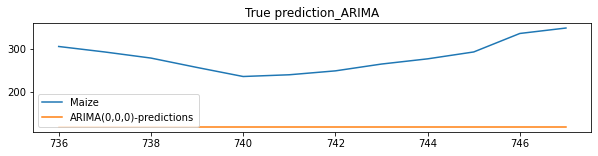

In [74]:
test['Maize'].plot(figsize=(10,2), legend=True, title='True prediction_ARIMA')
prediction.plot(legend=True)

<AxesSubplot:title={'center':'True prediction_ARIMA'}>

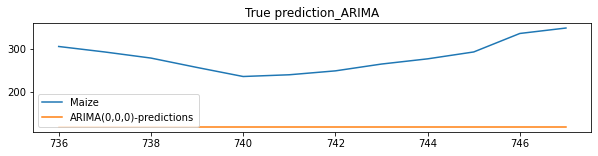

In [75]:
test['Maize'].plot(figsize=(10,2), legend=True, title='True prediction_ARIMA')
prediction.plot(legend=True)

# ERROR ESTIMATION

In [76]:
from statsmodels.tools.eval_measures import rmse, mse

In [77]:
rmse(test['Maize'],prediction)

166.0291601011661

In [78]:
mse(test['Maize'],prediction)

27565.682003898644

In [79]:
test['Maize'].mean()

281.1983333333333

In [80]:
prediction.mean()

118.73271289829148

# FINAL MODEL FORECASTING

In [81]:
FinalModel = ARIMA(df['Maize'], order=(1,1,0))

FinalResult = FinalModel.fit()

In [82]:
FinalResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Maize   No. Observations:                  748
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2644.581
Date:                Thu, 16 Jun 2022   AIC                           5293.163
Time:                        12:37:10   BIC                           5302.395
Sample:                             0   HQIC                          5296.721
                                - 748                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2634      0.021     12.464      0.000       0.222       0.305
sigma2        69.5856      1.427     48.753      0.000      66.788      72.383
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3604.36
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               7.64   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
forecast = FinalResult.predict(start=len(df),end=len(df)+47 , typ='levels').rename('ARIMA(1,1,0)-forecast')

<AxesSubplot:>

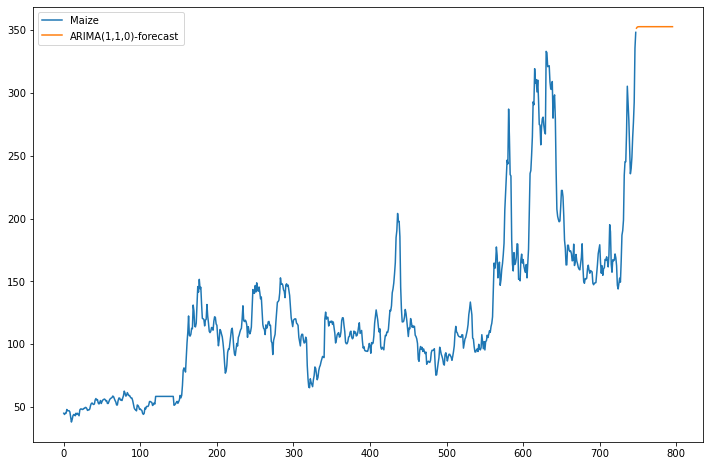

In [84]:
df['Maize'].plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)

In [85]:
print(forecast)

748    351.499540
749    352.376584
750    352.607609
751    352.668464
752    352.684494
753    352.688716
754    352.689828
755    352.690121
756    352.690199
757    352.690219
758    352.690224
759    352.690226
760    352.690226
761    352.690226
762    352.690226
763    352.690226
764    352.690226
765    352.690226
766    352.690226
767    352.690226
768    352.690226
769    352.690226
770    352.690226
771    352.690226
772    352.690226
773    352.690226
774    352.690226
775    352.690226
776    352.690226
777    352.690226
778    352.690226
779    352.690226
780    352.690226
781    352.690226
782    352.690226
783    352.690226
784    352.690226
785    352.690226
786    352.690226
787    352.690226
788    352.690226
789    352.690226
790    352.690226
791    352.690226
792    352.690226
793    352.690226
794    352.690226
795    352.690226
Name: ARIMA(1,1,0)-forecast, dtype: float64


# Kolmogorov-Smirnov test for goodness of fit. Normality of residuals

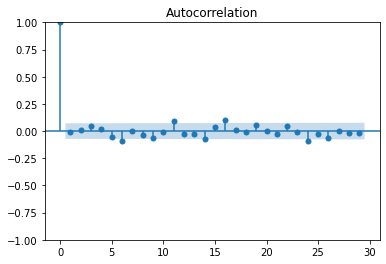

In [86]:
plot_acf(FinalResult.resid);

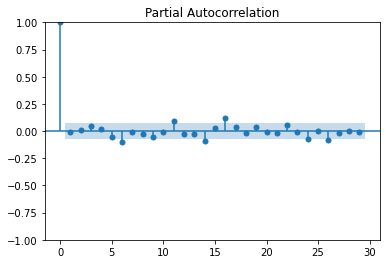

In [87]:
plot_pacf(FinalResult.resid);

<AxesSubplot:>

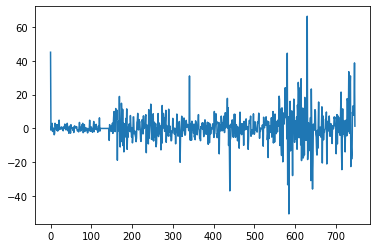

In [88]:
FinalResult.resid.plot()

<AxesSubplot:ylabel='Frequency'>

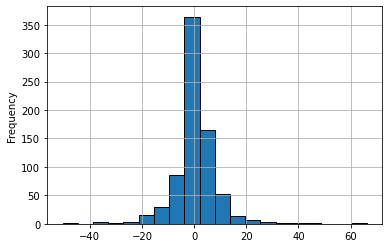

In [89]:
FinalResult.resid.plot.hist(bins=20,grid=True,edgecolor='k')

# NORMALITY TEST

In [91]:
stats.kstest(FinalResult.resid.values, 'norm') 

KstestResult(statistic=0.3083532549653919, pvalue=1.1946591952002209e-63)

In [92]:
stats.shapiro(FinalResult.resid)

ShapiroResult(statistic=0.8491008281707764, pvalue=4.325818613987735e-26)

In [93]:
from statsmodels.graphics.tsaplots import quarter_plot, month_plot

In [97]:
month_plot(df['Maize']);

ValueError: The index must be a DatetimeIndex or PeriodIndex

In [95]:
import statsmodels.api as sm

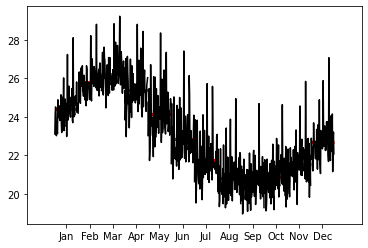

In [96]:
dta=sm.datasets.elnino.load_pandas().data
dta['YEAR']= dta.YEAR.astype(int).astype(str)
dta=dta.set_index('YEAR').T.unstack()
dates=pd.to_datetime(list(map(lambda x: '-'.join(x) + '-1', dta.index.values)))
dta.index=pd.DatetimeIndex(dates, freq='MS')
fig=sm.graphics.tsa.month_plot(dta)

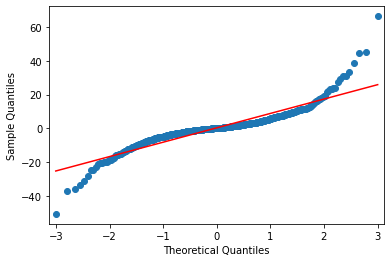

In [99]:
import numpy as np
import statsmodels.api as sm
import pylab


sm.qqplot(FinalResult.resid, line='s');

In [100]:
sm.stats.diagnostic.acorr_ljungbox(FinalResult.resid, lags=[30],return_df=True)

,lb_stat,lb_pvalue
30,52.717847,0.006367


# ARIMA-GARCH

In [101]:
sm.stats.diagnostic.het_arch(FinalResult.resid, nlags=20)

(93.3744954484511,
 1.8942198751318186e-11,
 5.201159408863045,
 2.571242575177594e-12)

In [102]:
resid= FinalResult.resid

In [103]:
resid

0      45.000000
1      -1.000886
2       1.263413
3      -0.263413
4       3.000000
         ...    
743    13.430844
744     7.912807
745    12.817971
746    38.695392
747     1.336950
Length: 748, dtype: float64

In [104]:
resid_train = resid.iloc[:736]
resid_test = resid.iloc[736:]

In [105]:
from arch import arch_model

In [106]:
model_garch = arch_model(resid_train , mean='constant', vol='GARCH', p=1, q=1)
results_garch = model_garch.fit(update_freq = 5)
results_garch.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 2426.6789571065074
Iteration:     10,   Func. Count:     60,   Neg. LLF: 2401.0819444705403
Iteration:     15,   Func. Count:     85,   Neg. LLF: 2400.7888032069272
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2400.7888032043156
            Iterations: 17
            Function evaluations: 94
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2400.79
Distribution:                  Normal   AIC:                           4809.58
Method:            Maximum Likelihood   BIC:                           4827.98
                                        No. Observations:                  736
Date:                Thu, Jun 16 2022   Df Residuals:                      735
Time:                        13:29:31   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0307      0.154      0.199      0.843 [ -0.272,  0.333]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3394      0.269      1.262      0.207   [ -0.188,  0.867]
alpha[1]       0.1073  1.964e-02      5.461  4.737e-08 [6.876e-02,  0.146]
beta[1]        0.8927  2.516e-02     35.480 1.002e-275   [  0.843,  0.942]
==========================================================================

Covariance estimator: robust
"""

In [107]:
rolling_predictions = []
test_size = 12

for i in range(test_size):
    train = resid[:-(test_size-i)]
    model = arch_model(train, mean='constant', vol='GARCH', p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [108]:
rolling_predictions = pd.Series(rolling_predictions, index=resid.index[-12:])

In [109]:
rolling_predictions

736    14.352528
737    16.981794
738    17.689680
739    17.082414
740    17.210001
741    17.019821
742    16.383751
743    15.704039
744    15.482799
745    14.862489
746    14.664237
747    18.797775
dtype: float64

NameError: name 'test_resid' is not defined

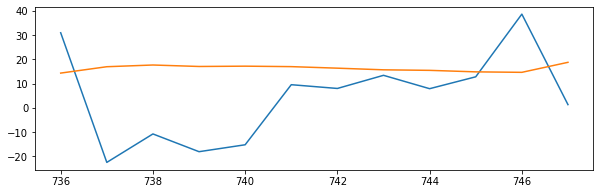

In [113]:
plt.figure(figsize=(10,3))
true, = plt.plot(resid_test)
preds, = plt.plot(rolling_predictions)
pred, = plt.plot(test_resid['prediction'])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility_ARIMA-GARCH','Prediction Volatility_ARIMA-LSTM'], fontsize=7)

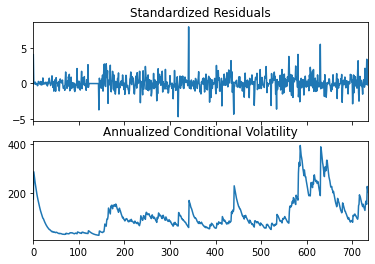

In [114]:
results_garch.plot(annualize='D');

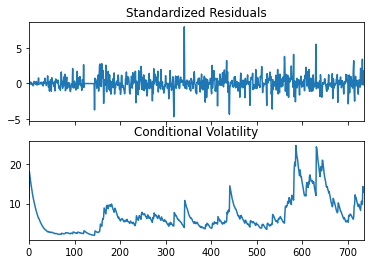

In [115]:
results_garch.plot();